# Using A VotingClassifier

- Plot the decision boundaries of a `VotingClassifier` for two features of the Iris dataset.

- Plot the class probabilities of the first sample in a toy dataset predicted by three different classifiers and averaged by the `VotingClassifier`.

First, three exemplary classifiers are initialized (`DecisionTreeClassifier`, `KNeighborsClassifier`, and `SVC`) and used to initialize a soft-voting `VotingClassifier` with weights `[2, 1, 2]`, which means that the predicted probabilities of the `DecisionTreeClassifier` and `SVC` count 5 times as much as the weights of the `KNeighborsClassifier` classifier when the averaged probability is calculated.

In [1]:
from itertools import product

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

import warnings
warnings.filterwarnings("ignore")


In [2]:
# Loading some example data
iris = datasets.load_iris()

In [3]:
# X = iris.data[:, [0, 2]]
X = iris.data[:,[1, 3]]
y = iris.target

In [4]:
X[0:5]

array([[3.5, 0.2],
       [3. , 0.2],
       [3.2, 0.2],
       [3.1, 0.2],
       [3.6, 0.2]])

In [5]:
np.unique(y)

array([0, 1, 2])

In [6]:
# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=7)
clf3 = SVC(gamma=.1, kernel='rbf', probability=True)
eclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2),
                                    ('svc', clf3)],
                        voting='soft', weights=[2, 1, 2])

In [7]:
clf1.fit(X, y)
clf2.fit(X, y)
clf3.fit(X, y)
eclf.fit(X, y)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier(max_depth=4)),
                             ('knn', KNeighborsClassifier(n_neighbors=7)),
                             ('svc', SVC(gamma=0.1, probability=True))],
                 voting='soft', weights=[2, 1, 2])

In [8]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf1.score(X, y)))

print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(clf2.score(X, y)))

print('Accuracy of SVC classifier on training set: {:.2f}'
     .format(clf3.score(X, y)))

print('Accuracy of a Voting Classifier using clf1, clf2, and clf3 on training set: {:.2f}'
     .format(eclf.score(X, y)))

Accuracy of Decision Tree classifier on training set: 0.97
Accuracy of KNN classifier on training set: 0.95
Accuracy of SVC classifier on training set: 0.96
Accuracy of a Voting Classifier using clf1, clf2, and clf3 on training set: 0.97


## Plotting decision regions using np.meshgrid()

### What is a meshgrid?

The purpose of meshgrid function in Python is to create a rectangular grid out of an array of x values and an array of y values.

Suppose you want to create a grid where you have a point at each integer value between 0 and 4 in both the x and y directions. To create a rectangular grid, you need every combination of the x and y points.

This is going to be 25 points. So you could create an x and y array for all of these points, which would result in the following x and y matrices, such that the pairing of the corresponding element in each matrix gives the x and y coordinates of a point in the grid.   (x on left, y on right)  

      0 1 2 3 4              0 0 0 0 0   
      0 1 2 3 4              1 1 1 1 1    
      0 1 2 3 4              2 2 2 2 2   
      0 1 2 3 4              3 3 3 3 3  
      0 1 2 3 4              4 4 4 4 4    

You could then plot these to verify that they are a grid  

```python
plt.plot(x, y, marker='.', color='k', linestyle='none')
```

Obviously, this gets very tedious especially for large ranges of x and y. Instead, meshgrid can actually generate this for you: all you have to specify are the unique x and y values.  

In [9]:
xvalues = np.array([0, 1, 2, 3, 4]);
yvalues = np.array([0, 1, 2, 3, 4]);

Now, when you call meshgrid, you get the points automatically.

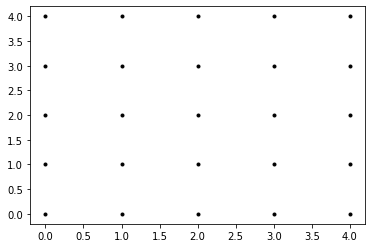

In [10]:
xx, yy = np.meshgrid(xvalues, yvalues)
 
plt.plot(xx, yy, marker='.', color='k', linestyle='none')

### Creating a meshgrid of our current dataset

1. find the minimum and maximum values of `X[ : , 0]` - the first value of each sublist of 2 in the array, `X`.

In [11]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1

2. find the minimum and maximum values of `X[ : , 1]` - the second value of each sublist of 2 in the array, `X`.

In [12]:
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

3. using those mins and maxes, we have the outer coordinate for our grid. We will call `meshgrid()` to generate all of the inner points 

In [13]:
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))


### Plot the decision boundaries

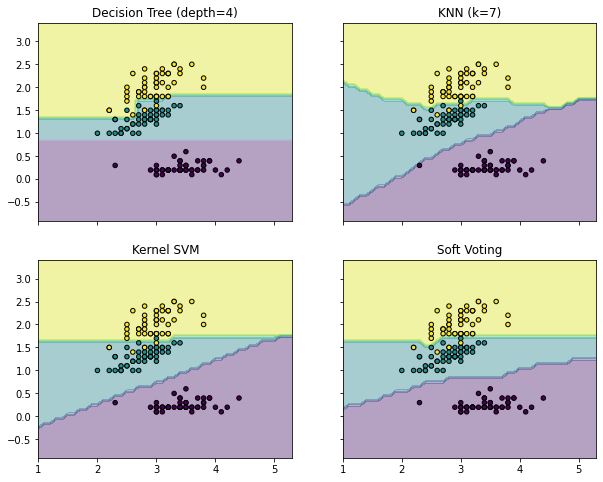

In [14]:

f, axarr = plt.subplots(2, 2, sharex='col', sharey='row', figsize=(10, 8))

for idx, clf, tt in zip(product([0, 1], [0, 1]),
                        [clf1, clf2, clf3, eclf],
                        ['Decision Tree (depth=4)', 'KNN (k=7)',
                         'Kernel SVM', 'Soft Voting']):

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.4)
    axarr[idx[0], idx[1]].scatter(X[:, 0], X[:, 1], c=y,
                                  s=20, edgecolor='k')
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

## Further Reading

- [Meshgrid function step-by-step walkthrough](https://www.quora.com/Can-you-explain-to-me-what-the-meshgrid-function-in-Python-does-step-by-step)